# Введение в регрессию 2
Давайте рассмотрим нарушения предпосылок Гаусса-Маркова на примере симулированных данных.

In [1]:
# Подключим нужные для базовых операций библиотеки
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Подключим пакеты для использования OLS метода и тестов
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Подгрузим полезные функции
from utils import *

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

## 1. Неверный тип зависимостей
Сгенерируем несколько кейсов, когда зависимость между факторами и таргетом в действительности нелинейная, но мы воспринимаем ее как линейную и применяем OLS алгоритм.

In [2]:
# Определим параметры выборки для задачи преобразования факторов
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 5,
    x1_width = 2.8,
    x2_mean = 20,
    x2_std = 5,
    
    # Зададим параметры распределения ошибки
    e_mean = 0,
    e_std = 300,

    # Укажем размер выборки
    N = 2000,

    # Зададим действительные параметры модели
    beta0 = 500,
    beta1 = 6.7,
    beta2 = 2.3
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

In [3]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_linearity = gen_data(y_type='linearity', params=dist_params, seed=RANDOM_SEED)

display(dt_linearity)

,x1,x2,x3,e,y
0,4.648712,22.483571,104.450402,149.014246,1348.831937
1,6.262000,19.308678,524.266456,-41.479290,3971.105962
2,5.649583,23.238443,284.172952,194.306561,2598.265337
3,5.276244,27.615149,195.633646,456.908957,2267.654383
4,4.036852,18.829233,56.647746,-70.246012,809.293884
...,...,...,...,...,...
1995,5.439474,25.350751,230.321104,321.045071,2364.196465
1996,6.278521,19.867394,532.999741,-7.956378,4063.141890
1997,3.793082,15.590627,44.393029,-264.562395,532.870897
1998,3.759753,19.184665,42.937828,-48.920089,738.763361


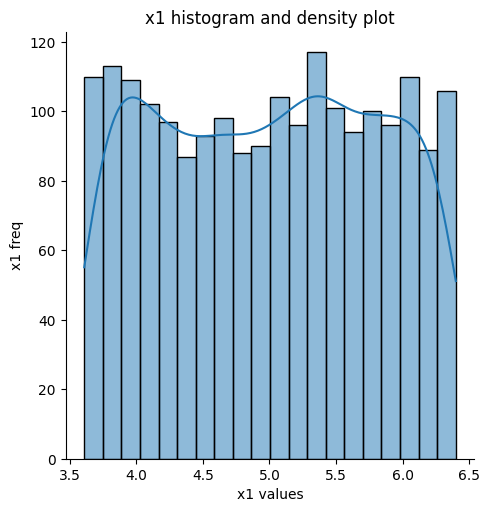

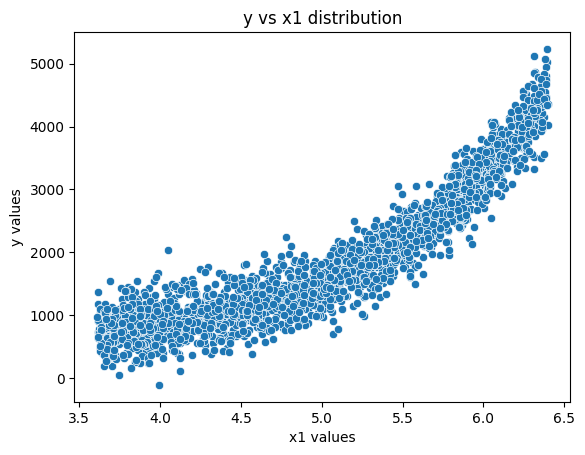

In [4]:
# Отрисуем факторы
plot_data(dt_linearity, target='y', feature_names=['x1'], plot_type='EDA')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     9262.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:11:03   Log-Likelihood:                -15089.
No. Observations:                2000   AIC:                         3.018e+04
Df Residuals:                    1998   BIC:                         3.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4146.3620     63.337    -65.465      0.0

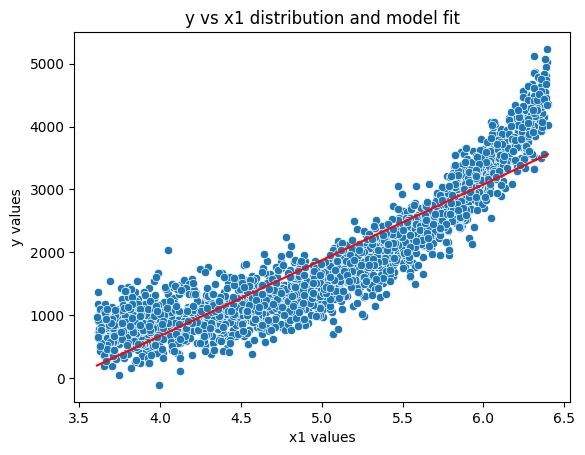

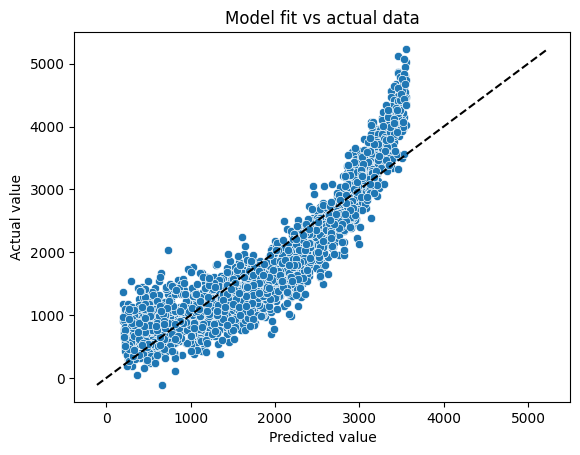

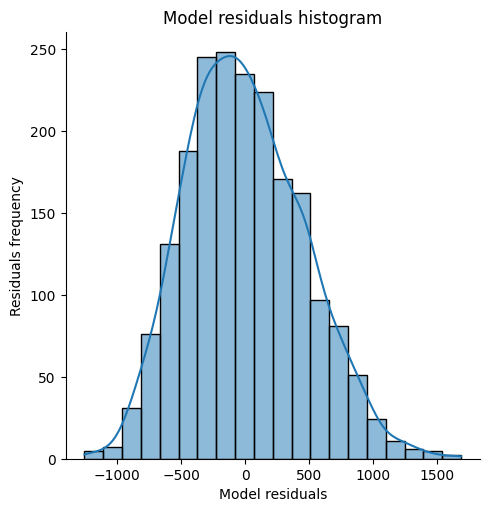

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.0,False,0.991704,,,not gaussian distribution
1,Epps-Pulley test,0.95,0.05,-,-,-,-,False,count more than 1000
2,D'Agostino's K-squared test,0.95,0.05,0.0,False,36.985933,,,not gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,4.334738,0.785,False,not gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.016598,False,0.034525,,,not gaussian distribution
5,Lilliefors test,0.95,0.05,0.001,False,0.034528,,,not gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.010761,False,0.730129,,,not gaussian distribution
7,Chi-squared test,0.95,0.05,0.0,False,375299968947541311488.0,,,not gaussian distribution
8,Jarque–Bera test,0.95,0.05,0.0,False,38.729458,,,not gaussian distribution
9,skewtest,0.95,0.05,0.0,False,6.018359,,,not gaussian distribution


In [5]:
# Обучим модель c неверной спецификацией и выведем результаты
# Здесь мы берем в качестве фактора сырые значения x1
dt_linearity, model_linearity = train_model(dt_linearity, target='y', feature_names=['x1'], show_results=True, pairwise=True, return_norm_tests=True)

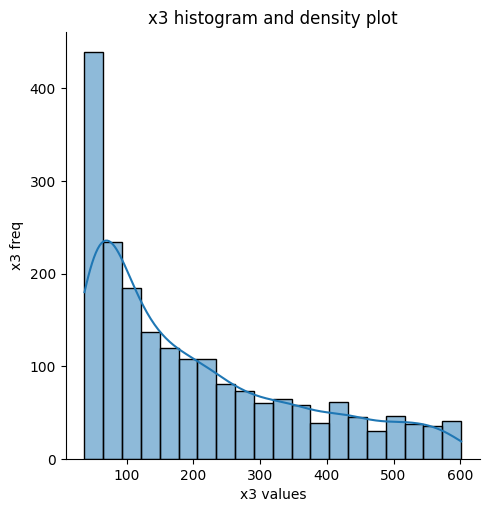

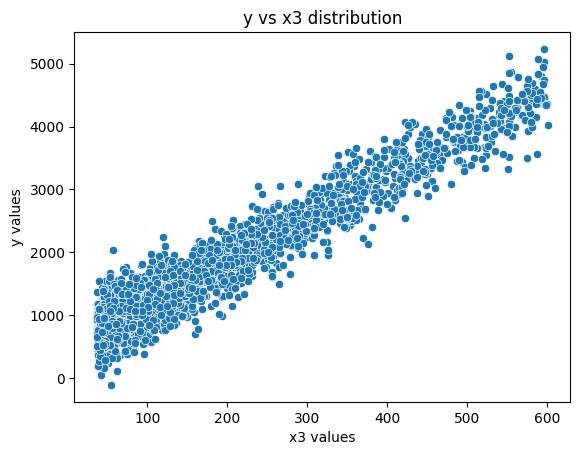

In [6]:
# Отрисуем факторы
plot_data(dt_linearity, target='y', feature_names=['x3'], plot_type='EDA')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.482e+04
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:11:05   Log-Likelihood:                -14221.
No. Observations:                2000   AIC:                         2.845e+04
Df Residuals:                    1998   BIC:                         2.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.2702     10.904     46.339      0.0

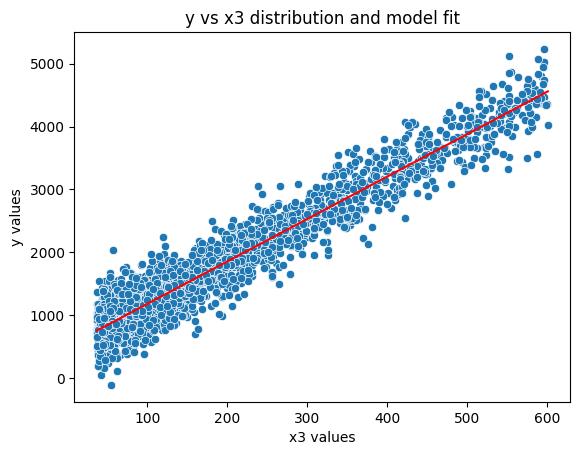

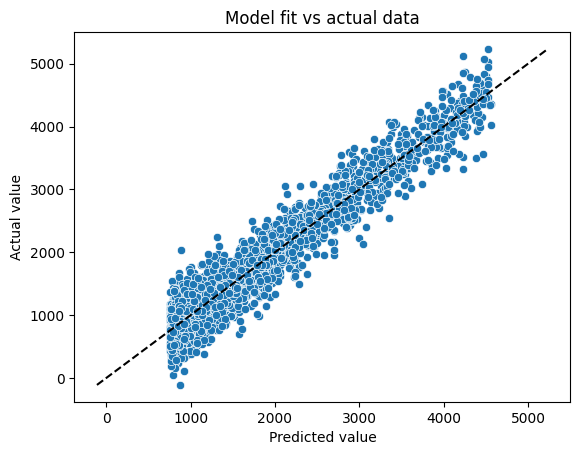

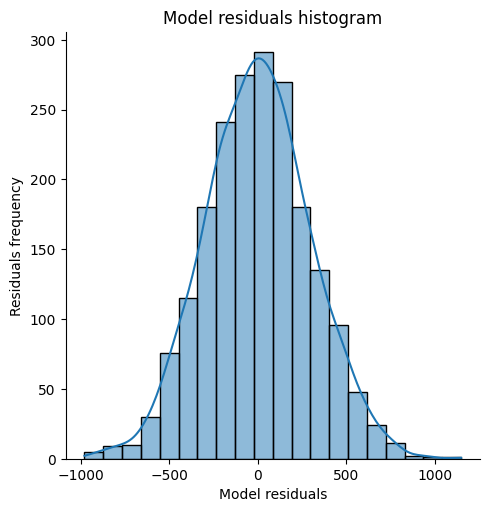

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.89688,True,0.999487,,,gaussian distribution
1,Epps-Pulley test,0.95,0.05,-,-,-,-,False,count more than 1000
2,D'Agostino's K-squared test,0.95,0.05,0.708933,True,0.687987,,,gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,0.208601,0.785,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.938226,True,0.011852,,,gaussian distribution
5,Lilliefors test,0.95,0.05,0.720605,True,0.011904,,,gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.9783,True,0.029343,,,gaussian distribution
7,Chi-squared test,0.95,0.05,0.0,False,140737488355327983616.0,,,not gaussian distribution
8,Jarque–Bera test,0.95,0.05,0.738401,True,0.606535,,,gaussian distribution
9,skewtest,0.95,0.05,0.574912,True,0.560831,,,gaussian distribution


In [7]:
# Обучим модель c верной спецификацией и выведем результаты
dt_linearity, model_linearity = train_model(dt_linearity, target='y', feature_names=['x3'], show_results=True, pairwise=True, return_norm_tests=True)

## 2. Пропущенная переменная
Сгенерируем несколько кейсов, когда мы пропустили переменную и применяем OLS алгоритм.

In [8]:
# Определим параметры выборки для задачи пропущенной переменной
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 25.0,
    x1_std = 10.3,
    x2_mean = 20.0,
    x2_std = 5.0,
    x3_mean = 30.0,
    x3_std = 8.0,
    corr_12 = 0.0,
    corr_23 = 0.0,
    corr_13 = 0.6,
    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 30.0,

    # Укажем размер выборки
    N = 2000,

    # Зададим действительные параметры модели
    beta0 = 500.0,
    beta1 = 6.7,
    beta2 = 2.3,
    beta3 = -17.7
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

,x1,x2,x3,e,y
0,19.692193,16.761557,27.418197,-33.422441,151.764749
1,9.310879,21.170685,21.197736,-18.927925,216.947620
2,11.849820,22.347372,16.157533,-28.261806,316.542614
3,18.238207,22.328649,28.638072,-16.439875,150.218123
4,16.717643,28.624589,37.358696,-6.424509,10.171325
...,...,...,...,...,...
1995,28.132897,19.795376,37.418537,66.295670,138.007341
1996,19.510030,17.311159,29.013193,9.809835,166.809178
1997,18.908264,17.406035,32.669227,-25.053735,63.420201
1998,17.043469,14.236759,23.589215,49.587392,278.994079


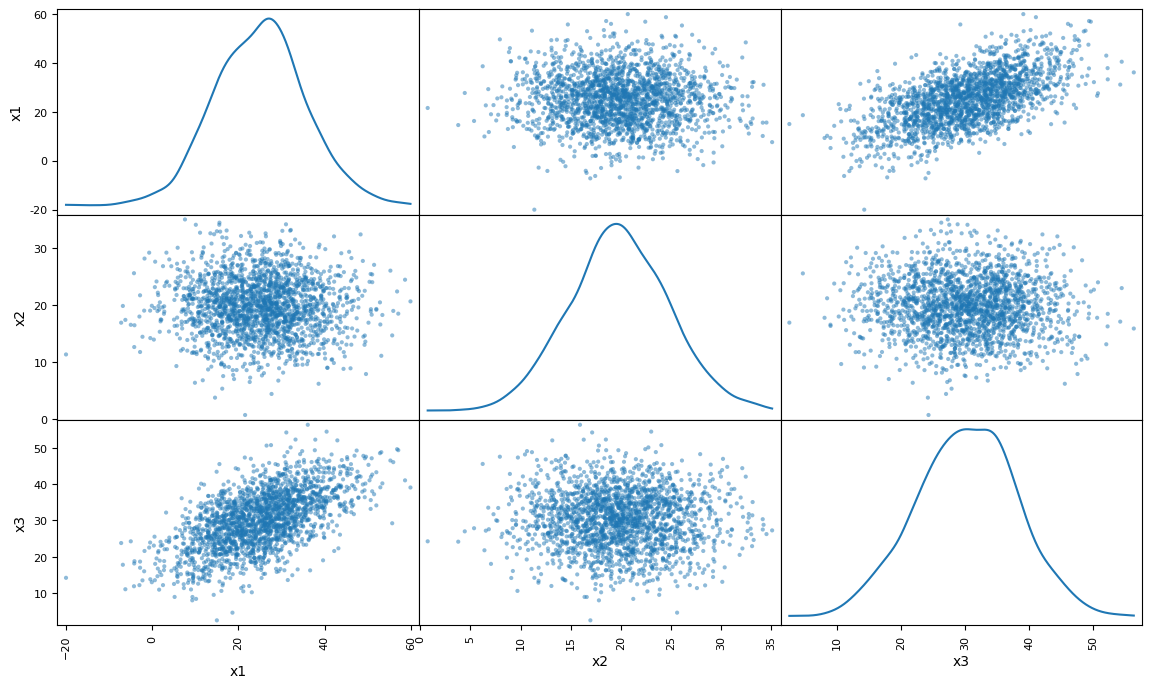

In [9]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_missing_var = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(dt_missing_var)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_missing_var[['x1', 'x2', 'x3']], figsize = (14,8), diagonal = 'kde');

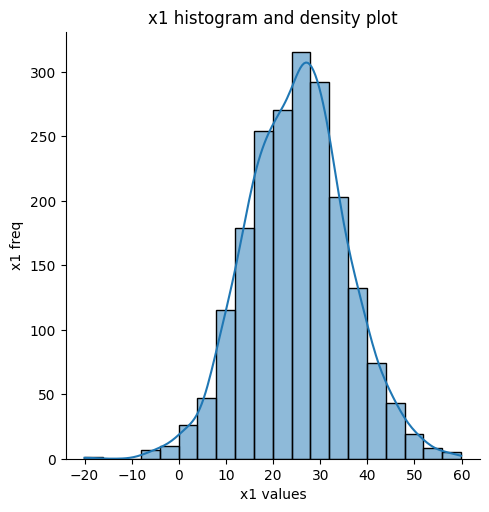

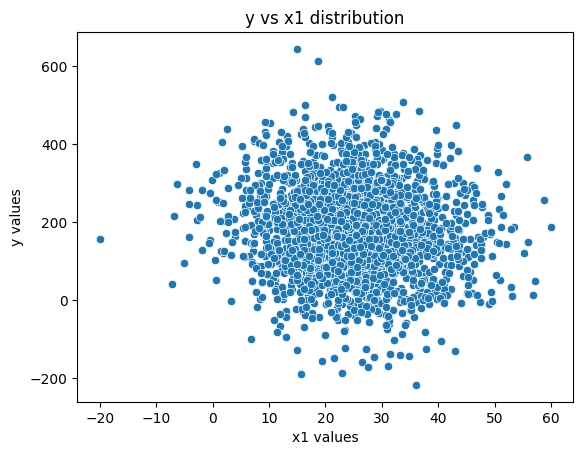

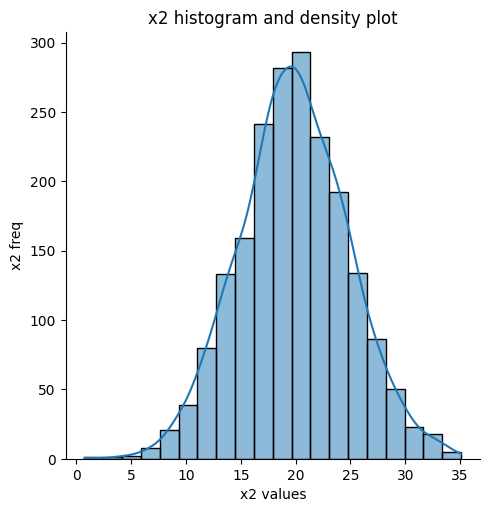

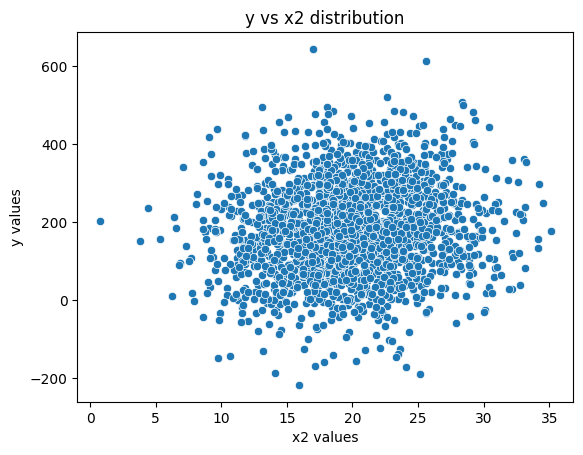

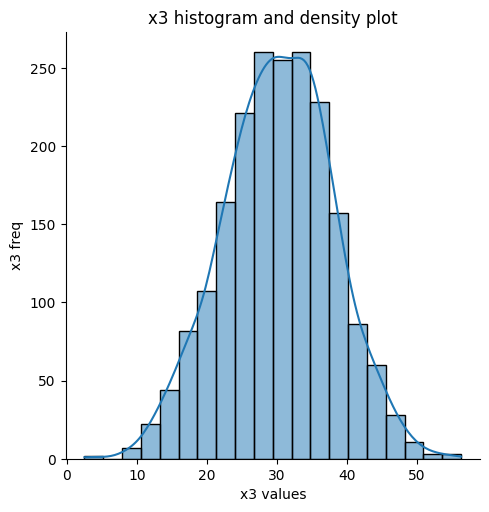

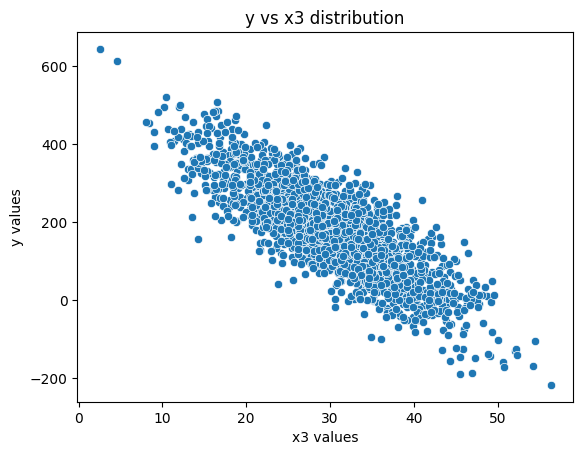

In [10]:
# Отрисуем факторы
plot_data(dt_missing_var, target='y', feature_names=['x1', 'x2', 'x3'], plot_type='EDA')

### Обучение модели с неверной спецификацией
Теперь мы решем построить линейную модель, чтобы найти взаимосвязь между нашими факторами x1, x2 и таргетом y

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.19
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           7.86e-10
Time:                        04:11:09   Log-Likelihood:                -12341.
No. Observations:                2000   AIC:                         2.469e+04
Df Residuals:                    1997   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.9906     12.471     12.348      0.0

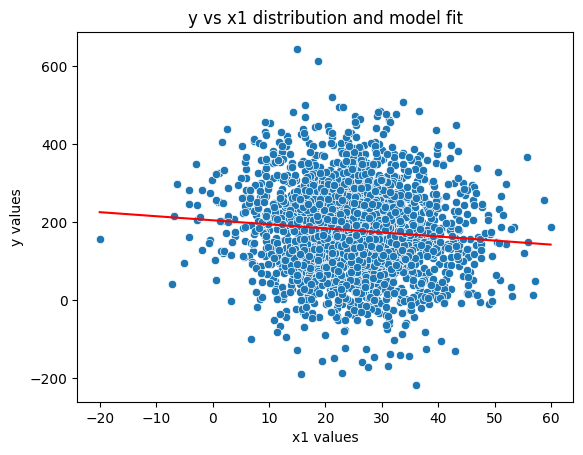

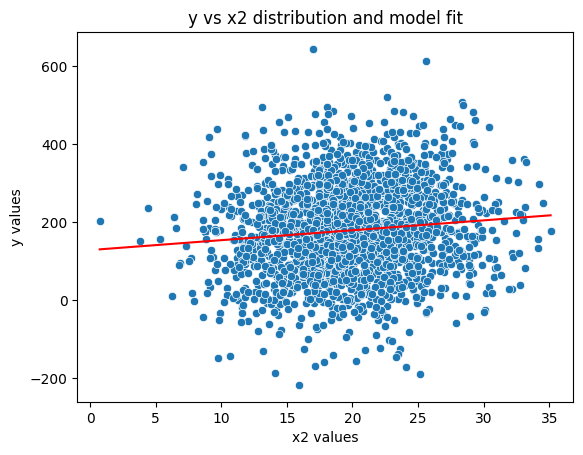

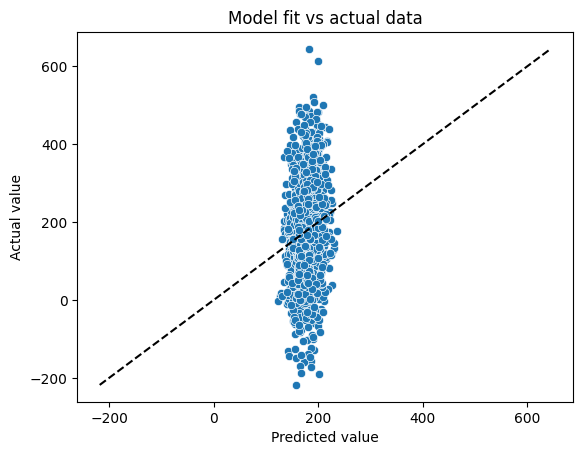

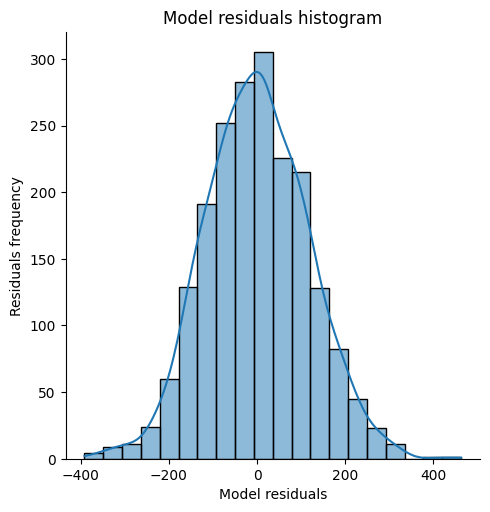

/Users/nimalykhin/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.294423,True,0.998957,,,gaussian distribution
1,Epps-Pulley test,0.95,0.05,-,-,-,-,False,count more than 1000
2,D'Agostino's K-squared test,0.95,0.05,0.33373,True,2.194847,,,gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,0.453486,0.785,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.616307,True,0.016832,,,gaussian distribution
5,Lilliefors test,0.95,0.05,0.203256,True,0.016854,,,gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.793676,True,0.063236,,,gaussian distribution
7,Chi-squared test,0.95,0.05,0.0,False,inf,,,not gaussian distribution
8,Jarque–Bera test,0.95,0.05,0.348734,True,2.106889,,,gaussian distribution
9,skewtest,0.95,0.05,0.257508,True,1.1323,,,gaussian distribution


In [11]:
# Обучим модель и выведем результаты
dt_missing_var, model_missing_var = train_model(dt_missing_var, target='y', feature_names=['x1', 'x2'], show_results=True, return_norm_tests=True)

### Обучение модели с корректной спецификацией
Допустим, мы поигрались со различными спецификациями и нашли ту, которую считаем наиболее правильной для описания процесса

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     8822.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:11:10   Log-Likelihood:                -9704.2
No. Observations:                2000   AIC:                         1.942e+04
Df Residuals:                    1996   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.6971      3.964    125.569      0.0

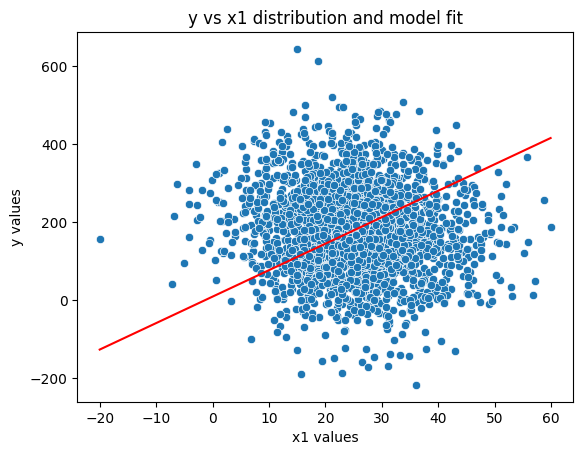

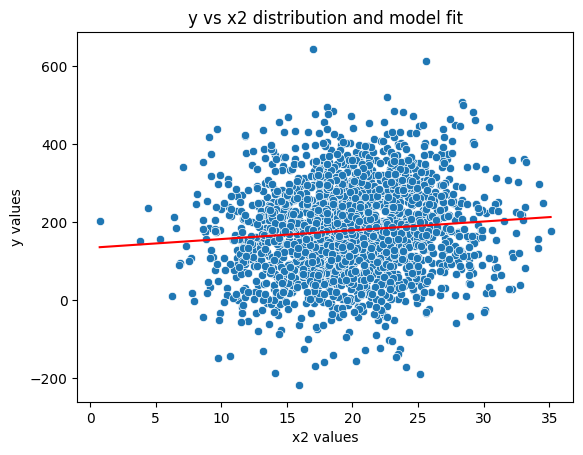

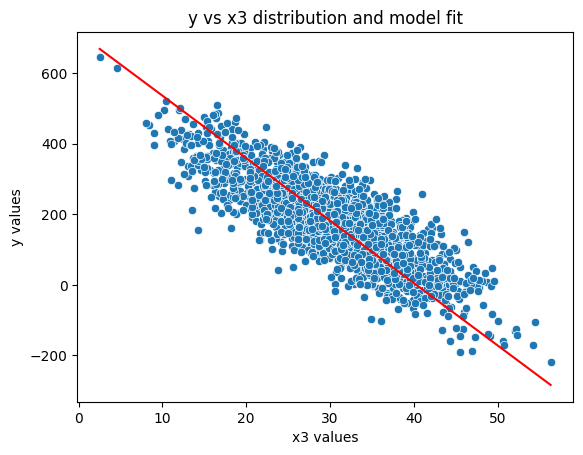

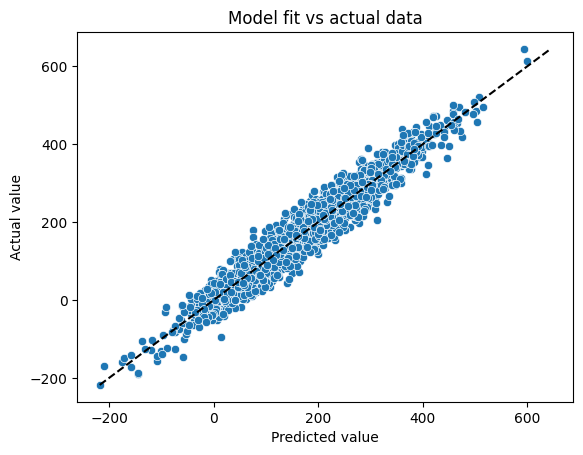

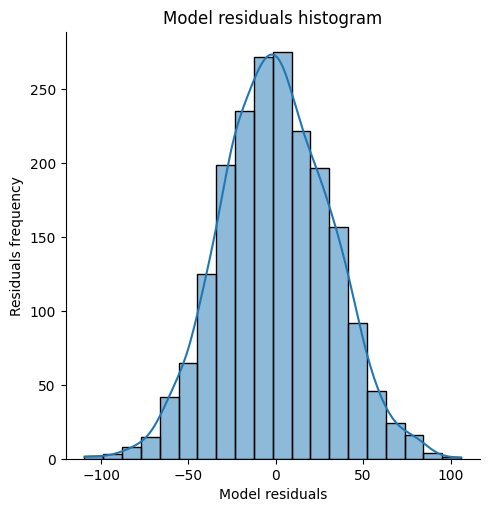

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.635899,True,0.999264,,,gaussian distribution
1,Epps-Pulley test,0.95,0.05,-,-,-,-,False,count more than 1000
2,D'Agostino's K-squared test,0.95,0.05,0.724071,True,0.645731,,,gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,0.476538,0.785,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.779323,True,0.014634,,,gaussian distribution
5,Lilliefors test,0.95,0.05,0.398343,True,0.01465,,,gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.662844,True,0.08512,,,gaussian distribution
7,Chi-squared test,0.95,0.05,1.0,True,-187649984473770688512.0,,,gaussian distribution
8,Jarque–Bera test,0.95,0.05,0.713611,True,0.674836,,,gaussian distribution
9,skewtest,0.95,0.05,0.433271,True,0.783607,,,gaussian distribution


In [12]:
# Обучим модель и выведем результаты
dt_missing_var, model_missing_var = train_model(dt_missing_var, target='y', feature_names=['x1', 'x2', 'x3'], show_results=True, return_norm_tests=True)